In [22]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv(r"C:\Users\Nischal\Desktop\BioVid_data_processing\Graph\sample.csv")
a=df["SUM_AU_r"]
a

0      5.20
1      5.51
2      5.49
3      5.40
4      5.60
       ... 
746    3.92
747    4.38
748    5.44
749    6.03
750    6.85
Name: SUM_AU_r, Length: 751, dtype: float64

In [24]:
AU_sum=a


In [25]:
b=a[300:]
b.mean()

6.039623059866962

Pain 1 Upper: 6.858448655155239
Pain 2 Upper: 7.511978468639286
Pain 3 Upper: 9.5308146345487535
Pain 4 Upper:

In [26]:
no_pain_UL= 5.55
pain_1_UL= 6.858448655155239
pain_2_UL= 7.511978468639286
pain_3_UL= 9.5308146345487535



def Pain_labeler(x_data, num_steps=100):
    """ Sliding window for calculating pain levels """
    # Prepare the list for the transformed data

    start_ix=0
    end_ix=num_steps
    
    Word_Label=[]
    
    # For the first sequence of frames: ########################################
    seq_X = x_data[start_ix:end_ix]
    one_second_value=seq_X.mean()
    
    if one_second_value<= no_pain_UL:
        Word_Label.append("No Pain")
    elif one_second_value >no_pain_UL and one_second_value<pain_1_UL:
        Word_Label.append("Pain Level 1")
    elif one_second_value >pain_1_UL and one_second_value<pain_2_UL:
        Word_Label.append("Pain Level 2")
    elif one_second_value >pain_2_UL and one_second_value<pain_3_UL:
        Word_Label.append("Pain Level 3")
    elif one_second_value >pain_3_UL:
        Word_Label.append("Pain Level 4")    
    ############################################################################

    # Loop of the entire data set (apart from the first sequence)
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        start_ix= start_ix + num_steps
        end_ix = end_ix + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[start_ix:end_ix]
        one_second_value=seq_X.mean()
        if one_second_value<= no_pain_UL:
            Word_Label.append("No Pain")
        elif one_second_value >no_pain_UL and one_second_value<pain_1_UL:
            Word_Label.append("Pain Level 1")
        elif one_second_value >pain_1_UL and one_second_value<pain_2_UL:
            Word_Label.append("Pain Level 2")
        elif one_second_value >pain_2_UL and one_second_value<pain_3_UL:
            Word_Label.append("Pain Level 3")
        elif one_second_value >pain_3_UL:
            Word_Label.append("Pain Level 4") 

    return Word_Label

In [27]:
file=Pain_labeler(a)

In [28]:
file

['Pain Level 4',
 'Pain Level 4',
 'Pain Level 4',
 'Pain Level 2',
 'Pain Level 1',
 'Pain Level 1',
 'No Pain']

In [29]:
len(file)

7

Pain levels: 4,4,2,1,1


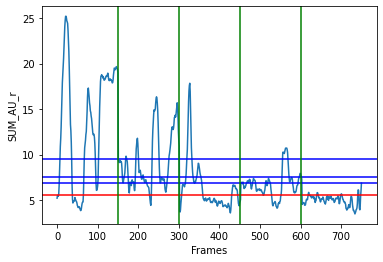

In [31]:
plt.plot(AU_sum)
# plt.plot(Final_DF['SUM_AU_r'])
plt.ylabel('SUM_AU_r')
plt.xlabel('Frames')
plt.axhline(y=no_pain_UL, color='r', linestyle='-')
plt.axhline(y=pain_1_UL, color='b', linestyle='-')
plt.axhline(y=pain_2_UL, color='b', linestyle='-')
plt.axhline(y=pain_3_UL, color='b', linestyle='-')
plt.axvline(x=150, color='g')
plt.axvline(x=300, color='g')
plt.axvline(x=450, color='g')
plt.axvline(x=600, color='g')
print('Pain levels: 4,4,2,1,1')

In [32]:
file

['Pain Level 4',
 'Pain Level 4',
 'Pain Level 4',
 'Pain Level 2',
 'Pain Level 1',
 'Pain Level 1',
 'No Pain']

In [33]:
count_np=0
count_p1=0
count_p2=0
count_p3=0
count_p4=0
for level in file:
    if level=='No Pain':
        count_np+=1
    if level=='Pain Level 1':
        count_p1+=1
    if level=='Pain Level 2':
        count_p2+=1
    if level=='Pain Level 3':
        count_p3+=1
    if level=='Pain Level 4':
        count_p4+=1
print("The sliding window counter:    ")
print("No Pain count is:   ",count_np)
print("Pain 1 count is:    ",count_p1)
print("Pain 2 count is:    ",count_p2)
print("Pain 3 count is:    ",count_p3)
print("Pain 4 count is:    ",count_p4)

The sliding window counter:    
No Pain count is:    1
Pain 1 count is:     2
Pain 2 count is:     1
Pain 3 count is:     0
Pain 4 count is:     3


In [34]:
# b=df["PSPI_score"]

Pain levels: 4,4,2,1,1


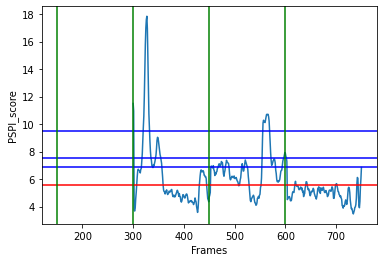

In [39]:
plt.plot(b)
# plt.plot(Final_DF['SUM_AU_r'])
plt.ylabel('PSPI_score')
plt.xlabel('Frames')
plt.axhline(y=no_pain_UL, color='r', linestyle='-')
plt.axhline(y=pain_1_UL, color='b', linestyle='-')
plt.axhline(y=pain_2_UL, color='b', linestyle='-')
plt.axhline(y=pain_3_UL, color='b', linestyle='-')
plt.axvline(x=150, color='g')
plt.axvline(x=300, color='g')
plt.axvline(x=450, color='g')
plt.axvline(x=600, color='g')
# plt.legend()
print('Pain levels: 4,4,2,1,1')